# Reinforcement Learning - Homework 3
This script implements importance sampling to approximate the integral of a complicated function. To accurately estimate the integral, several samples of x values are taken from within a region and for every sample x_i, the f(x_i) is computed where f(x) is the function being integrated. Samples x_i are taken using both uniform sampling methods and sampling with a mixture of beta distributions chosen to mirror the shape of the function f(x). The performance of these different sampling methods is then compared to see which method estimates the true value of the integral (12.1687) more accurately and efficiently.

## Written Project

### Question 1: Importance Sampling
1a) The integral can be expressed as:

$$ \begin{align}
\int_a^b f(x) dx &= \int_a^b f(x) \frac{p(x)}{p(x)} dx \\
&= \int_a^b \biggl[ \frac{f(x)}{p(x)} \biggr] p(x) dx \\
&= \mathbb{E}_p \biggl[\frac{f(x)}{p(x)} \biggr]
\end{align}
$$

where $p(x)$ is a generic probability distribution such that $p(x) \neq 0$ on the interval $[a, b]$.

1b) Compute the integral of the function:
$$
f(x) = \biggl|\sin^5(\pi x) - 2\cos^3(3\cos^2(\frac{x}{\pi})))\biggr|
$$

using the uniform distribution and obtain 2 digits of accuracy.

In [ ]:
from scipy.stats.distributions import nakagami_gen
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

def importance_sampling(solution, f, accuracy, p, sample):
    estimates = []
    average = 0
    samples = 1

    while True:
        x_i = sample()
        z_i = f(x_i) / p(x_i)

        average += (z_i - average) / samples
        estimates.append(average)
        samples += 1

        if np.var(estimates) < 0.02 and samples >= 5:
            break

    return estimates

29702 Estimates Required for 0.01 accuracy
Final estimate: 12.170697998960637


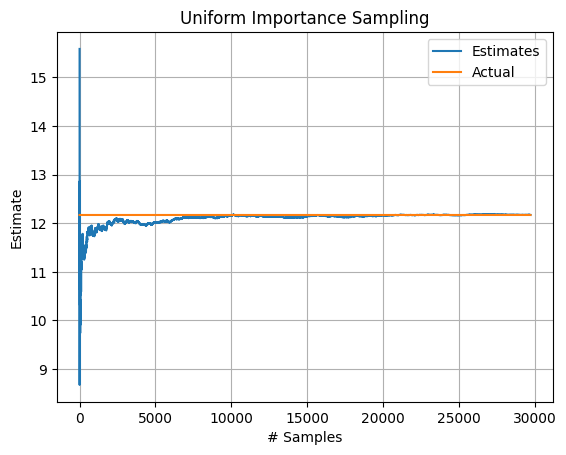

In [ ]:
""" Sometimes takes a long time to run
"""

a = 0
b = 10
solution = 12.1687
accuracy = 1e-2
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

uniform_pdf = lambda x: 1 / (b - a) if x <= b and x >= a else 0
uniform_samples = lambda : np.random.uniform(a, b)

estimates = importance_sampling(solution, f_x, accuracy, uniform_pdf, uniform_samples)
print(len(estimates), "Estimates Required for 0.01 accuracy")
print("Final estimate:", estimates[-1])

plt.plot(range(len(estimates)), estimates, label = "Estimates")
plt.plot(range(len(estimates)), [12.1687]*len(estimates), label = "Actual")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Uniform Importance Sampling")
plt.legend()
plt.grid()
plt.show()

In [ ]:
""" We can also find the number of samples necessary by finding population
    variance and computing the number N needed such that error <= 0.01
"""
N = 10000
x = uniform.rvs(a, b - a, size = N)
pdf = 1 / (b - a)

fx = f_x(x) / pdf
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

2526552 samples needed to ensure 0.01 accuracy


1c) Graph f(x) between 0 and 10, and find other probability distributions that achieve the same level of accuracy with fewer samples than the uniform distribution

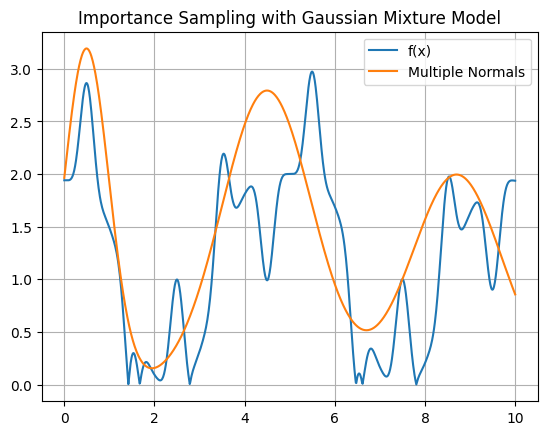

In [ ]:
x = np.linspace(0, 10, 1000)
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

phi1 = 7*norm.pdf(x, 4.496, 1)
phi2 = 4*norm.pdf(x, 0.493, 0.5)
phi3 = 5*norm.pdf(x, 8.7, 1)

plt.plot(x, f_x(x), label="f(x)")
plt.plot(x, phi1 + phi2 + phi3, label="Multiple Normals")
plt.title("Importance Sampling with Gaussian Mixture Model")
plt.legend()
plt.grid()
plt.show()

In [ ]:
accuracy = 1e-2
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)
px_i = lambda x : 0.35*norm.pdf(x, 4.496, 1) + 0.35*norm.pdf(x, 0.493, 0.5) + 0.3*norm.pdf(x, 8.7, 1)


estimates = []
variances = []
average = 0
samples = 1
solution = 12.1687

while True:

    x_i = random.random()

    while True:  # sample from mixed normal

        if x_i <= 0.35:
            x_i = np.random.normal(4.496, 0.5)

        elif x_i <= 0.7:
            x_i = np.random.normal(0.493, 0.5)

        else:
            x_i = np.random.normal(8.7, 1)

        if x_i <= 10 and x_i >= 0:
            break

    z_i = f_x(x_i) / px_i(x_i)

    average += (z_i - average) / samples

    estimates.append(average)
    samples += 1

    variances.append(np.var(estimates))

    if variances[-1] < 0.02 and samples >= 5:
        break

9128 Estimates Required
Last estimate: 12.171968712192541


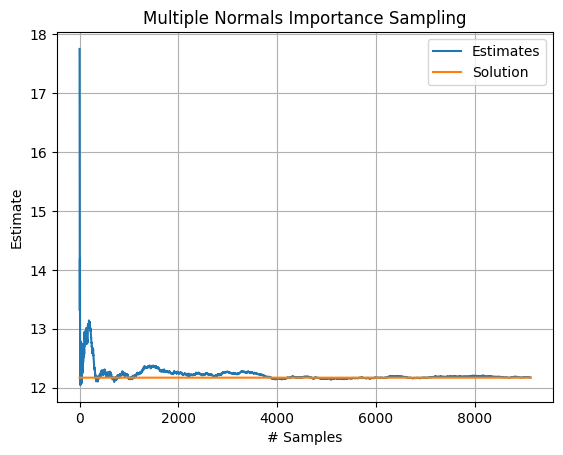

In [ ]:
print(len(estimates), "Estimates Required")
print("Last estimate:", estimates[-1])
plt.plot(range(len(estimates)), estimates, label="Estimates")
plt.plot(range(len(estimates)), [solution]*len(estimates), label="Solution")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Multiple Normals Importance Sampling")
plt.grid()
plt.legend()
plt.show()

In [ ]:
""" Similarly as with 1b, we can also find the number of samples necessary
    using statistical methods
"""
N = 10000
x = []
pdf = lambda x : 0.35*norm.pdf(x, 4.496, 1) + 0.35*norm.pdf(x, 0.493, 0.5) + 0.3*norm.pdf(x, 8.7, 1)


for i in range(N):

    x_i = random.random()

    while True:

        if x_i <= 0.35:
            x_i = np.random.normal(4.496, 0.5)

        elif x_i <= 0.7:
            x_i = np.random.normal(0.493, 0.5)

        else:
            x_i = np.random.normal(8.7, 1)

        if x_i <= 10 and x_i >= 0:
            x.append(x_i)
            break

x = np.array(x)
fx = f_x(x) / pdf(x)
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

1361560 samples needed to ensure 0.01 accuracy


1d) Repeat 1c with a mixture of beta distributions, scaled to interval [0, 10].

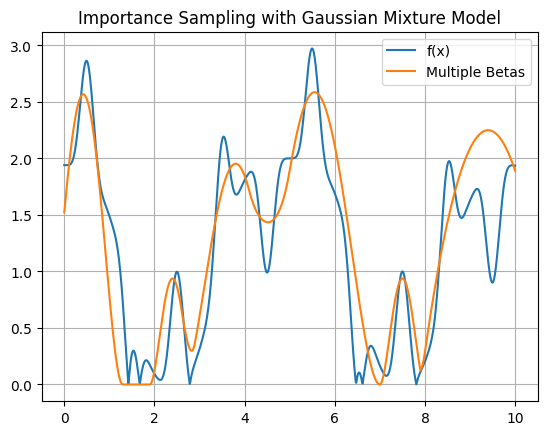

In [ ]:
x = np.linspace(0, 10, 1000)
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)

beta1 = 2.4*beta.pdf(x, 3.2, 3.1, -0.5, 1.8)
beta2 = 0.5*beta.pdf(x, 3, 3, 1.9, 1)
beta3 = 2.5*beta.pdf(x, 3, 3, 2.6, 2.4)
beta4 = 4*beta.pdf(x, 3, 3, 4.1, 2.9)
beta5 = 0.5*beta.pdf(x, 3, 3, 7, 1)
beta6 = 4.5*beta.pdf(x, 2, 2, 7.9, 3)

plt.plot(x, f_x(x), label="f(x)")
plt.plot(x, beta1 + beta2 + beta3 + beta4 + beta5 + beta6, label="Multiple Betas")
plt.title("Importance Sampling with Gaussian Mixture Model")
plt.legend()
plt.grid()
plt.show()

In [ ]:
accuracy = 1e-2
f_x = lambda x : np.abs(np.sin(np.pi * x)**5 - 2 * np.cos(3 * np.cos(x / np.pi)**2)**3)
px_i = lambda x : 0.2*beta.pdf(x, 3.2, 3.1, -0.5, 1.8) + 0.1*beta.pdf(x, 3, 3, 1.9, 1) + 0.2*beta.pdf(x, 3, 3, 2.6, 2.4) + 0.3*beta.pdf(x, 3, 3, 4.1, 2.8) + 0.2*beta.pdf(x, 2, 2, 6.75, 4)


estimates = []
variances = []
average = 0
samples = 1
solution = 12.1687

while True:

    x_i = random.random()

    while True:  # sample from mixed beta

        if x_i <= 0.3:
            x_i = beta.rvs(3, 3, 4.1, 2.8)

        elif x_i <= 0.5:
            x_i = beta.rvs(3.2, 3.1, -0.5, 1.8)

        elif x_i <= 0.7:
            x_i = beta.rvs(3, 3, 2.6, 2.4)

        elif x_i <= 0.9:
            x_i = beta.rvs(2, 2, 6.75, 4)

        else:
            x_i = beta.rvs(3, 3, 1.9, 1)


        if x_i <= 10 and x_i >= 0:
            break

    z_i = f_x(x_i) / px_i(x_i)

    average += (z_i - average) / samples

    estimates.append(average)
    samples += 1

    variances.append(np.var(estimates))

    if variances[-1] < 0.02 and samples >= 5:
        break

32500 Estimates Required
Last estimate: 12.462346254972745


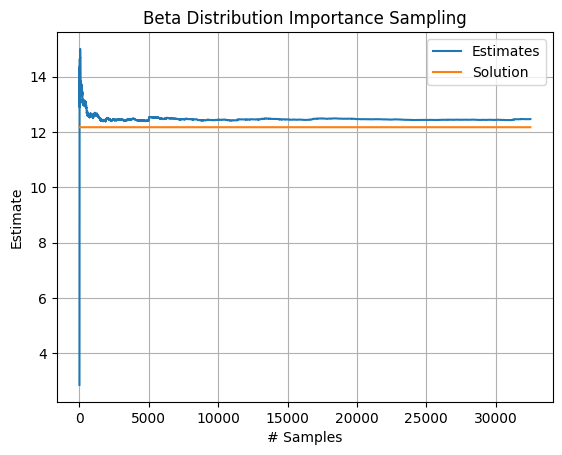

In [ ]:
print(len(estimates), "Estimates Required")
print("Last estimate:", estimates[-1])
plt.plot(range(len(estimates)), estimates, label="Estimates")
plt.plot(range(len(estimates)), [solution]*len(estimates), label="Solution")
plt.xlabel("# Samples")
plt.ylabel("Estimate")
plt.title("Beta Distribution Importance Sampling")
plt.grid()
plt.legend()
plt.show()

In [ ]:
""" Similarly as with 1c, we can also find the number of samples necessary
    for beta distribution using statistical methods
"""
N = 10000
x = []
pdf = lambda x : 0.2*beta.pdf(x, 3.2, 3.1, -0.5, 1.8) + 0.1*beta.pdf(x, 3, 3, 1.9, 1) + 0.2*beta.pdf(x, 3, 3, 2.6, 2.4) + 0.3*beta.pdf(x, 3, 3, 4.1, 2.8) + 0.2*beta.pdf(x, 2, 2, 6.75, 4)


for i in range(N):

    x_i = random.random()

    while True:

        if x_i <= 0.3:
            x_i = beta.rvs(3, 3, 4.1, 2.8)

        elif x_i <= 0.5:
            x_i = beta.rvs(3.2, 3.1, -0.5, 1.8)

        elif x_i <= 0.7:
            x_i = beta.rvs(3, 3, 2.6, 2.4)

        elif x_i <= 0.9:
            x_i = beta.rvs(2, 2, 6.75, 4)

        else:
            x_i = beta.rvs(3, 3, 1.9, 1)

        if x_i <= 10 and x_i >= 0:
            x.append(x_i)
            break

x = np.array(x)
fx = f_x(x) / pdf(x)
avg = np.mean(fx)
var = np.var(fx)

t = 1.96
samples_needed = var * (t / accuracy)**2
print(round(samples_needed), "samples needed to ensure 0.01 accuracy")

1828045 samples needed to ensure 0.01 accuracy
